# NOTEBOOK FOR ANALYSIS OF OULAD DATA

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\synthea readmission analysis"))

import src.plots as P
import src.stat_tests as S

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [2]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\oulad dropout analysis\data\processed_data\processed_oulad_data.csv")

In [ ]:
cat_cols = data.select_dtypes(include='object').columns.values.tolist()
num_cols = data.select_dtypes(include='number').columns.values.tolist()

In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code_module               32593 non-null  object 
 1   code_presentation         32593 non-null  object 
 2   gender                    32593 non-null  object 
 3   region                    32593 non-null  object 
 4   highest_education         32593 non-null  object 
 5   imd_band                  31482 non-null  object 
 6   age_band                  32593 non-null  object 
 7   num_of_prev_attempts      32593 non-null  int64  
 8   studied_credits           32593 non-null  int64  
 9   disability                32593 non-null  object 
 10  final_result              32593 non-null  object 
 11  date_registration         32593 non-null  float64
 12  date_unregistration       10072 non-null  float64
 13  total_vle_used            32593 non-null  float64
 14  total_

In [5]:
data.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,total_vle_used,total_clicks,total_assessments,attempted_assessment,non_attempted_assessment,average_score
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,55.0,934.0,5.0,5.0,0.0,82.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,84.0,1435.0,5.0,5.0,0.0,66.4
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,22.0,281.0,0.0,0.0,0.0,0.0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,82.0,2158.0,5.0,5.0,0.0,76.0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,66.0,1034.0,5.0,5.0,0.0,54.4


In [6]:
data[['total_assessments','attempted_assessment','non_attempted_assessment']]= data[['total_assessments','attempted_assessment','non_attempted_assessment']].astype('Int64')

In [7]:
data.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,total_vle_used,total_clicks,total_assessments,attempted_assessment,non_attempted_assessment,average_score
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,55.0,934.0,5,5,0,82.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,84.0,1435.0,5,5,0,66.4
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,22.0,281.0,0,0,0,0.0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,82.0,2158.0,5,5,0,76.0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,66.0,1034.0,5,5,0,54.4


In [8]:
data.describe().round(2)

,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,total_vle_used,total_clicks,total_assessments,attempted_assessment,non_attempted_assessment,average_score
count,32593.00,32593.00,32593.00,10072.00,32593.00,32593.00,32593.0,32593.0,32593.0,32593.00
mean,0.16,79.76,-69.39,49.76,60.15,1215.14,5.34,5.28,0.06,57.65
std,0.48,41.07,49.23,82.46,55.90,1692.60,4.33,4.34,0.53,32.93
min,0.00,30.00,-322.00,-365.00,0.00,0.00,0.0,0.0,0.0,0.00
25%,0.00,60.00,-100.00,-2.00,19.00,142.00,1.0,1.0,0.0,43.00
50%,0.00,60.00,-57.00,27.00,46.00,602.00,5.0,5.0,0.0,70.57
75%,0.00,120.00,-29.00,109.00,86.00,1585.00,9.0,9.0,0.0,82.40
max,6.00,655.00,167.00,444.00,413.00,24139.00,14.0,14.0,12.0,100.00


### Statistical Insight from numerical columns

In [9]:

data.describe(include='object')

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability,final_result
count,32593,32593,32593,32593,32593,31482,32593,32593,32593
unique,7,4,2,13,5,10,3,2,4
top,BBB,2014J,M,Scotland,A Level or Equivalent,20-30%,0-35,N,Pass
freq,7909,11260,17875,3446,14045,3654,22944,29429,12361


### Statistical insight from categorical column

In [10]:

data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,num_of_prev_attempts,7
1,studied_credits,61
2,date_registration,332
3,date_unregistration,416
4,total_vle_used,325
5,total_clicks,5381
6,total_assessments,15
7,attempted_assessment,15
8,non_attempted_assessment,13
9,average_score,2601


In [11]:
data.select_dtypes(include='number').columns

Index(['num_of_prev_attempts', 'studied_credits', 'date_registration',
       'date_unregistration', 'total_vle_used', 'total_clicks',
       'total_assessments', 'attempted_assessment', 'non_attempted_assessment',
       'average_score'],
      dtype='object')

In [12]:

data.select_dtypes(include='object').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,code_module,7
1,code_presentation,4
2,gender,2
3,region,13
4,highest_education,5
5,imd_band,10
6,age_band,3
7,disability,2
8,final_result,4


In [ ]:
small_cat_cols = ['code_module', 'code_presentation', 'gender',
       'highest_education', 'imd_band', 'age_band', 'disability','num_of_prev_attempts']

In [ ]:
large_num_cols = [ 'studied_credits', 'date_registration',
       'date_unregistration', 'total_vle_used', 'total_clicks','total_assessments', 'attempted_assessment', 'non_attempted_assessment',
       'average_score']

In [ ]:
large_cat_cols = ['region']

In [ ]:
target_col = ['final_result']

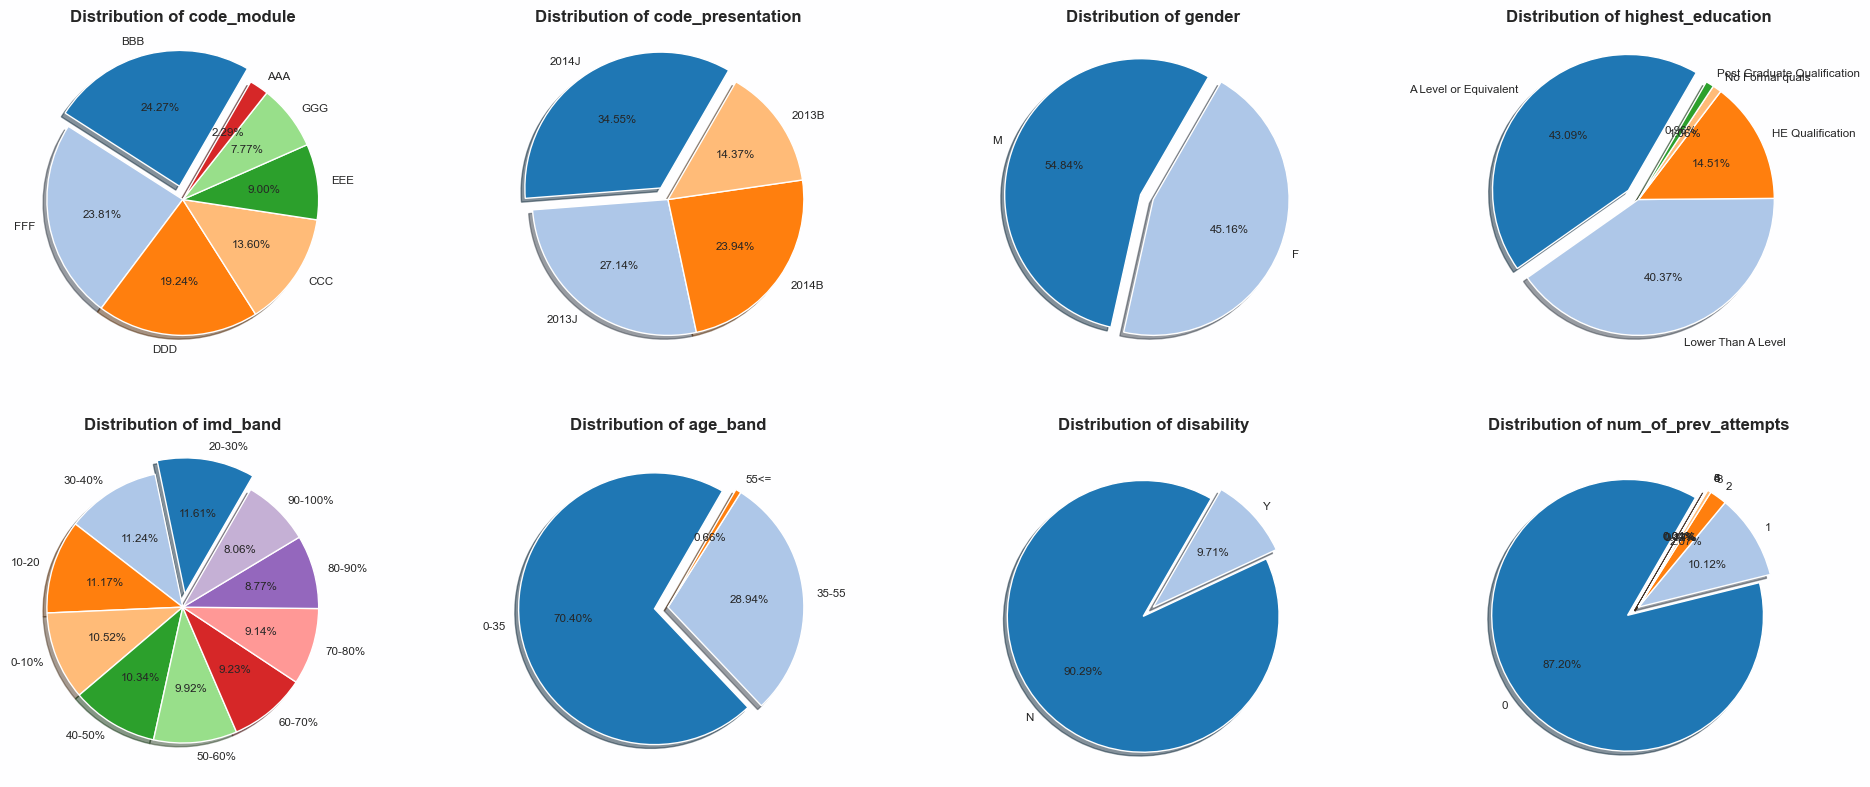

In [17]:
fig = plt.figure(figsize=(24,15))
limit = len(small_cat_cols)
for i,column in enumerate(small_cat_cols):
    if i> limit:
        break
    plt.subplot(3,4,i+1)
    P.plot_pie(column=column,data=data)

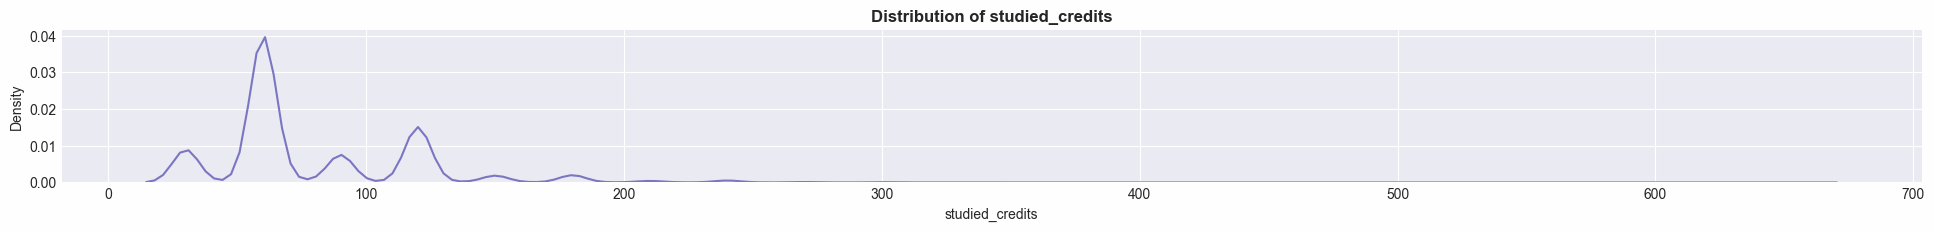

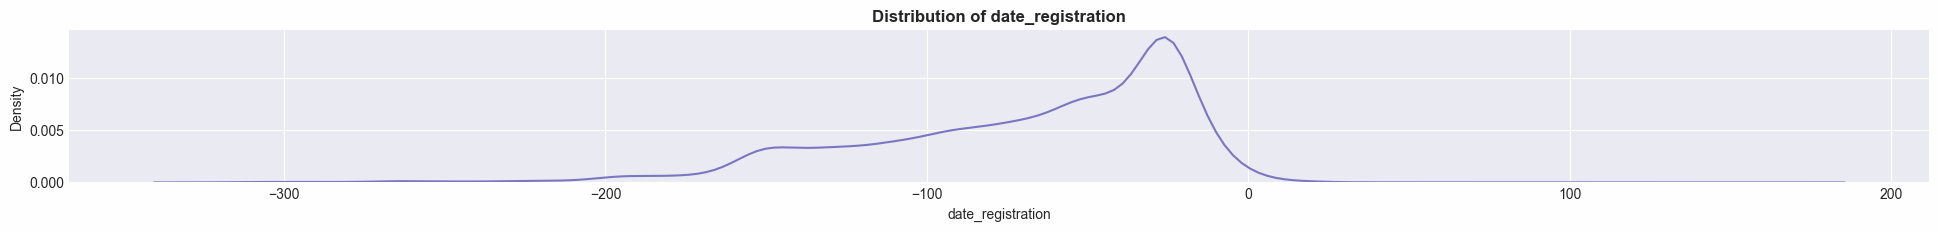

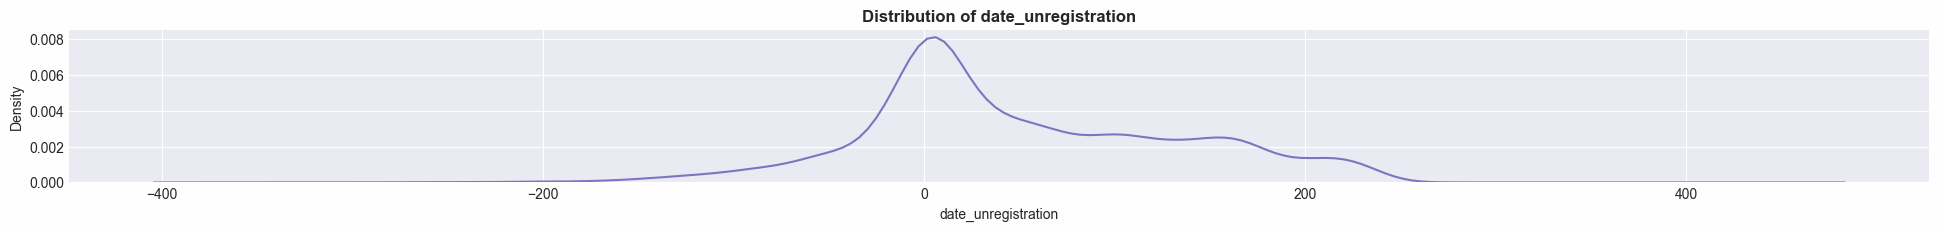

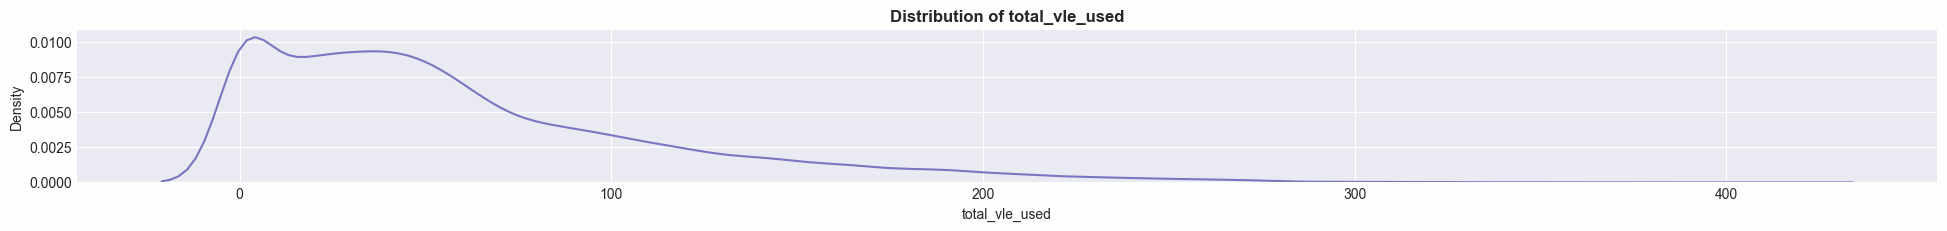

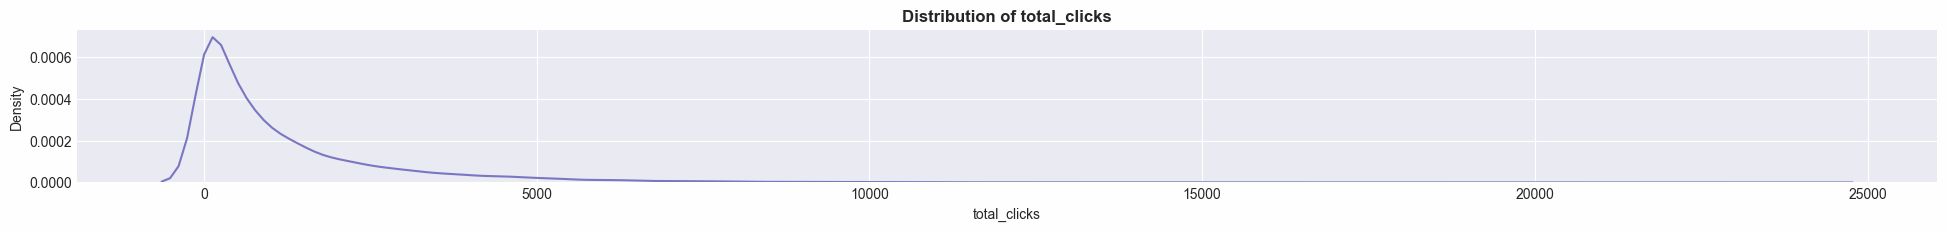

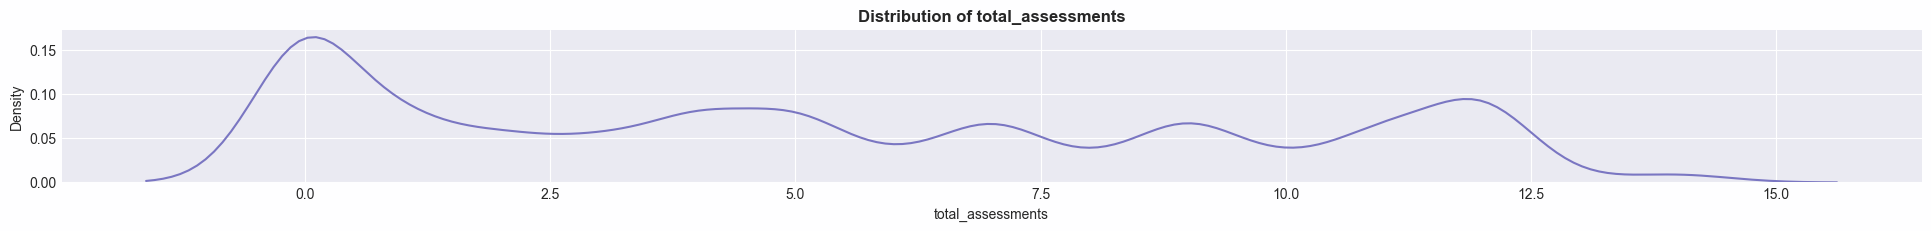

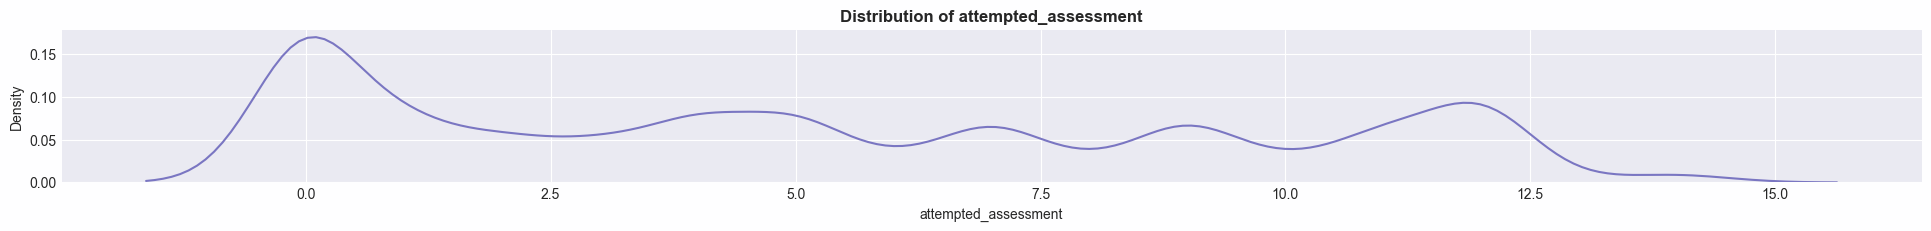

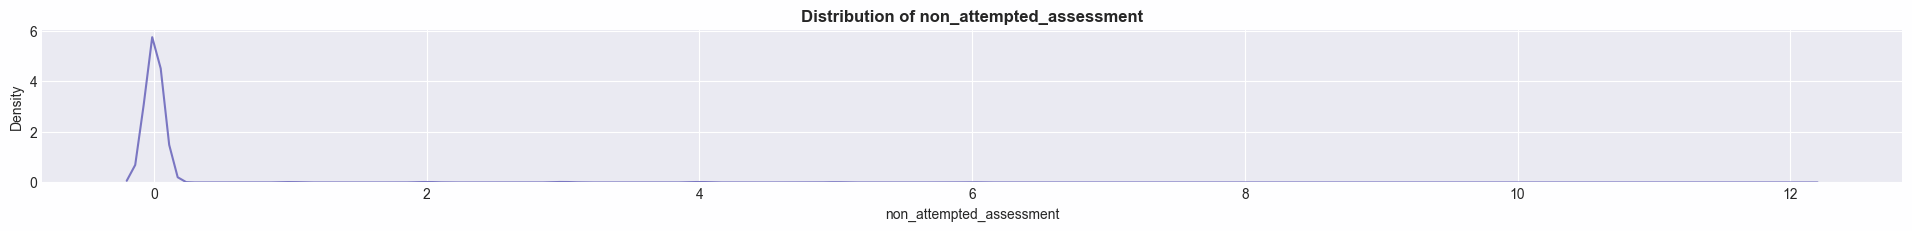

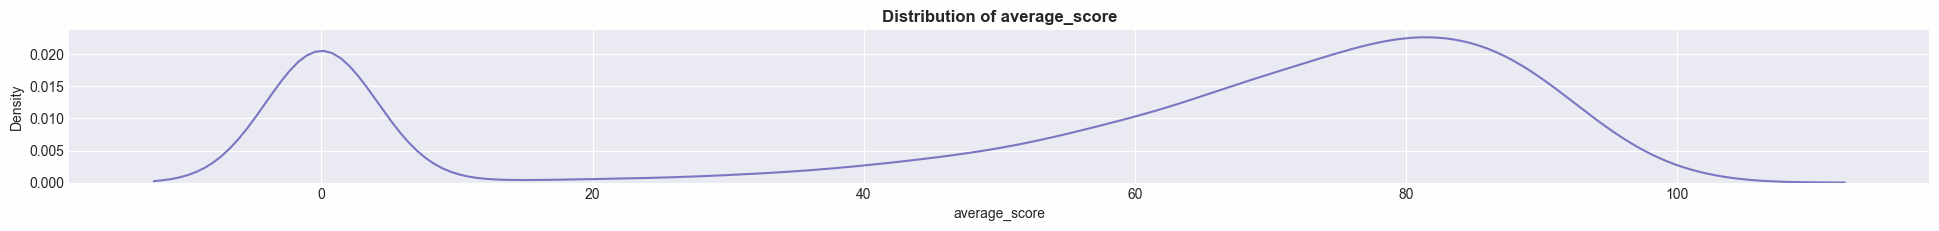

In [18]:
limit = len(large_num_cols)
for i,column in enumerate(large_num_cols):
    if i> limit:
        break
    fig = plt.figure(figsize=(24,21))
    plt.subplot(9,1,i+1)
    P.plot_kde(column=column,data=data)
    plt.show()

Findings of columns based on univariate analysis
Categorical Columns

BBB and FFF have the most occurances in course_module column and AAA have the least occurances

2014J have the most occurance in code_presentation column

M have slighly more occurances than F in gender column

region column is divided into 13 classes and scotland occured most of the times

highest_education column have 5 unique values and post graduation and no formal eduation occurs least of the time

imd_band column is distributed almost equally in all classes, having 3.41% of occurances as unknown

0-35 age band have the highest occurance in age_band column with least occurance of 55+ age bands

more than 90% of occurances have N in disability column

31% of occurances are withdrawn in the final result column

Numerical Columns

most of the values of number_of_previous_attempts column is around 0

studied_credit column is skewed towards right with most values around the median

date_registration column have a peak before 0

date_unregistration column vales peaks around 0

total_vle_used column is skewed towrds the bigger side

total_clicks column is heavily skewed to the bigger side with more values near 0

total_assessment column is someway uniformly distributed with more values around 0

attempted_assessment follows same distribution as total_assessment

non_attempted_assessment is skewed towards right with more values around 0

average_score have 2 peaks one at bigger end and one at 0

In [19]:

for cols in large_cat_cols:
    df = data[cols].value_counts(normalize=True).mul(100).round(2).reset_index(name = r"% of observations").sort_values(by ="% of observations", ascending = False ).head(10)
    display(df)
    display("_"*50)

,region,% of observations
0,Scotland,10.57
1,East Anglian Region,10.25
2,London Region,9.87
3,South Region,9.49
4,North Western Region,8.92
5,West Midlands Region,7.92
6,South West Region,7.47
7,East Midlands Region,7.26
8,South East Region,6.48
9,Wales,6.40


'__________________________________________________'

Insights from univariate analysis of large categorical columns

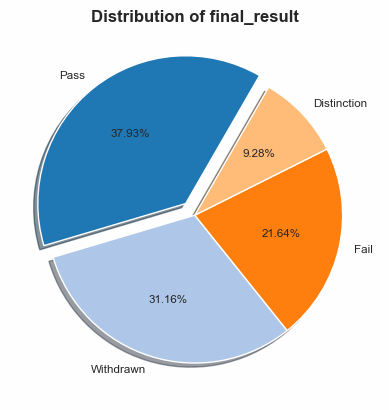

In [20]:
P.plot_pie('final_result',data=data)


Insight from univariate analysis of target column

***

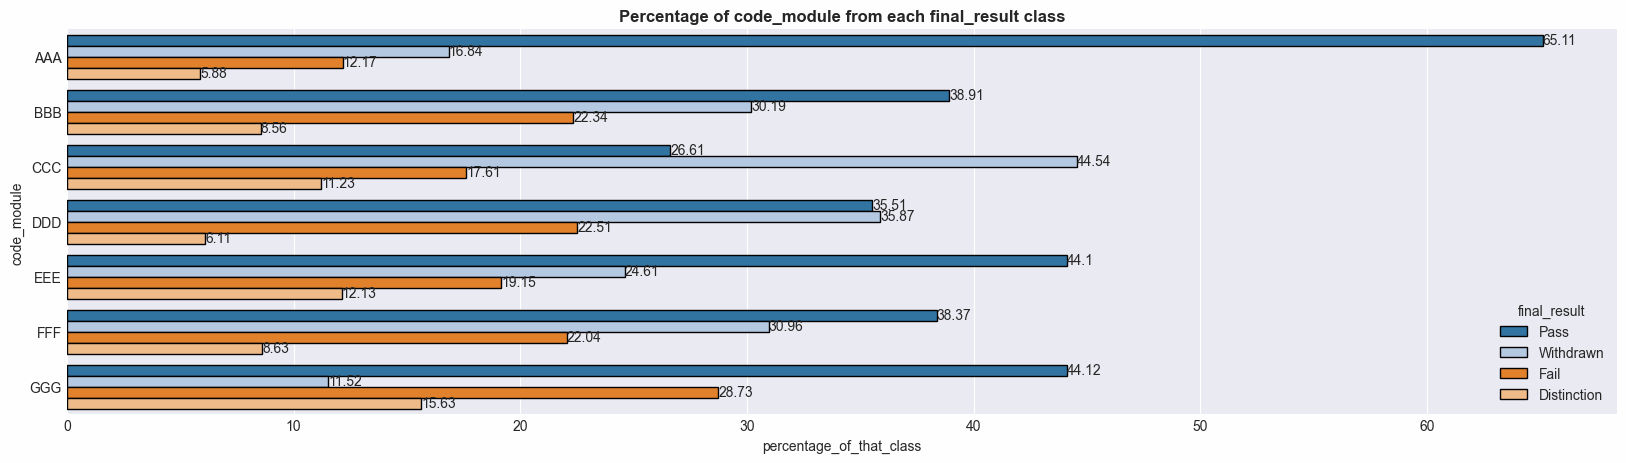

In [25]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='code_module',data=data,target='final_result',orient='h')

In [27]:
code_module_mask = (data['code_module']=='CCC')
ct = pd.crosstab(code_module_mask,data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.127 → Moderate


{'statistic': np.float64(527.6279777139816),
 'p': np.float64(4.908684736436746e-114),
 'dof': 3,
 'cramers_v': np.float64(0.12723357782075154),
 'strength': 'Moderate',
 'expected': array([[ 2612.61056055,  6092.63547387, 10679.39124965,  8774.36271592],
        [  411.38943945,   959.36452613,  1681.60875035,  1381.63728408]])}

code module has moderate relationship

***

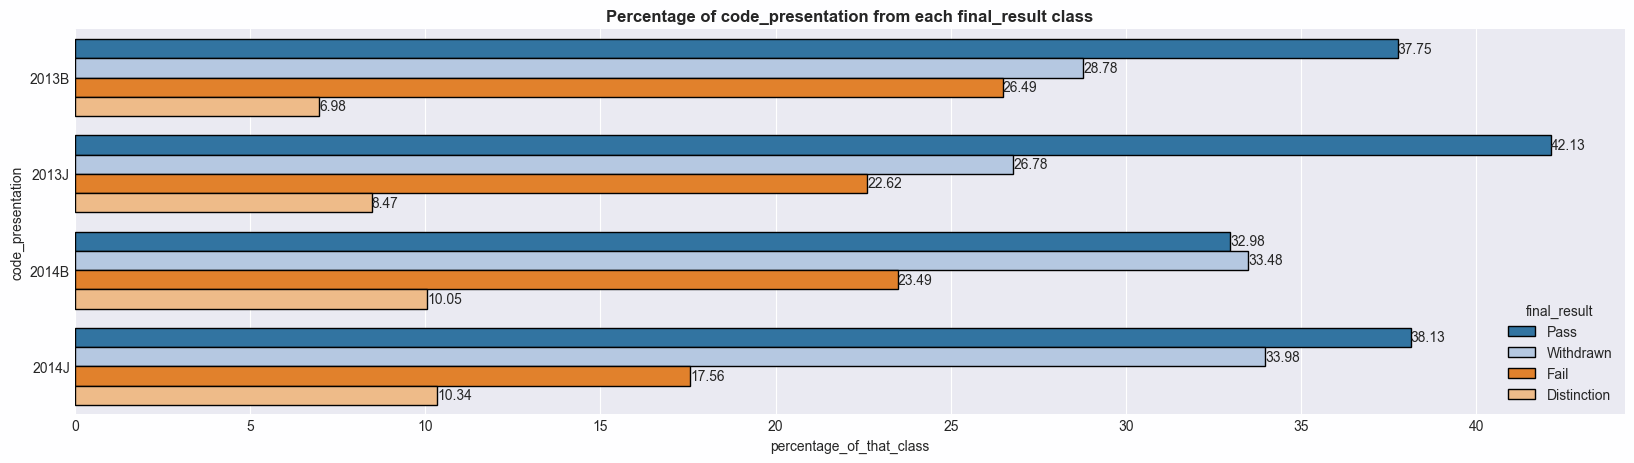

In [28]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='code_presentation',data=data,target='final_result',orient='h')

no such relationship found

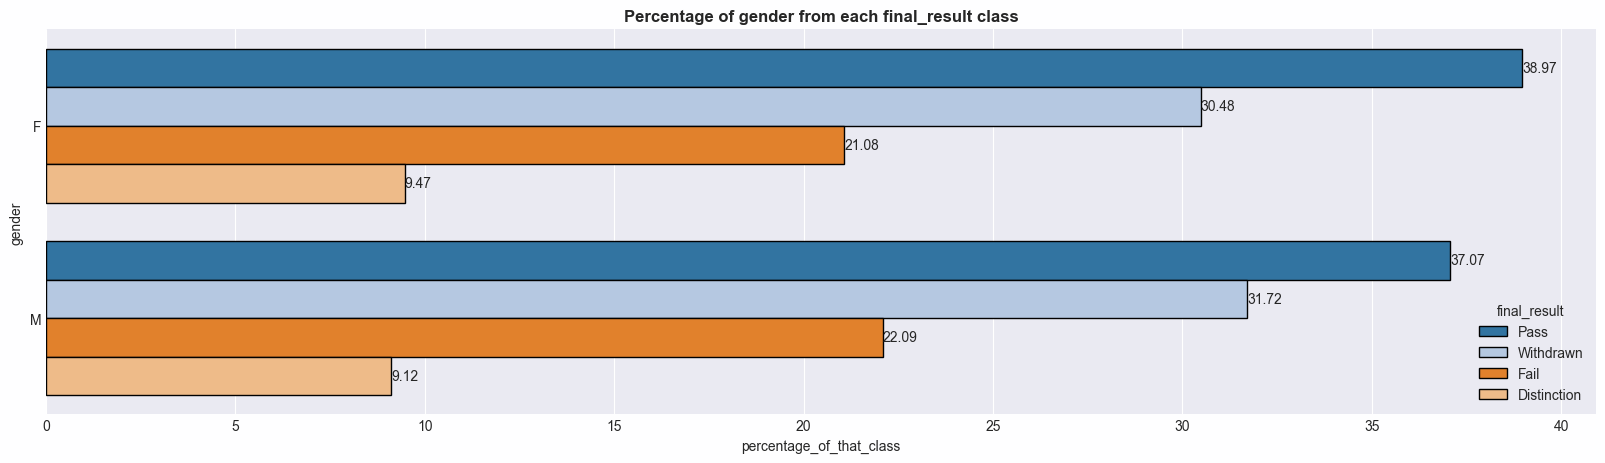

In [29]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='gender',data=data,target='final_result',orient='h')

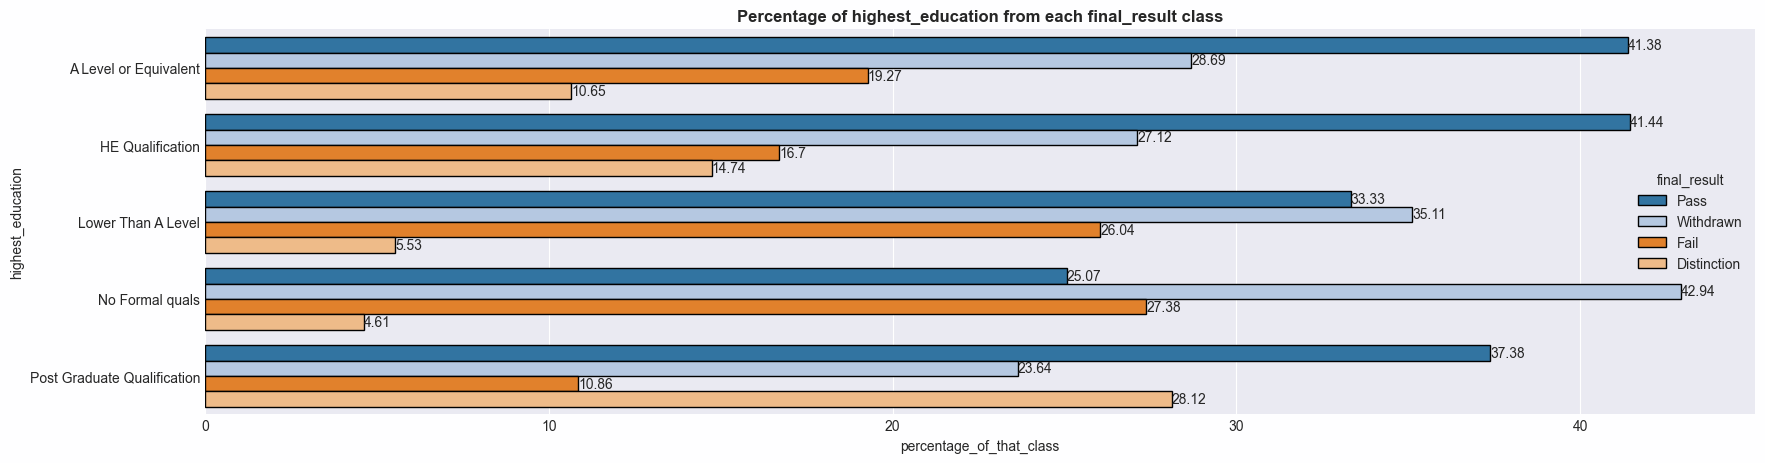

In [31]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='highest_education',data=data,target='final_result',orient='h')

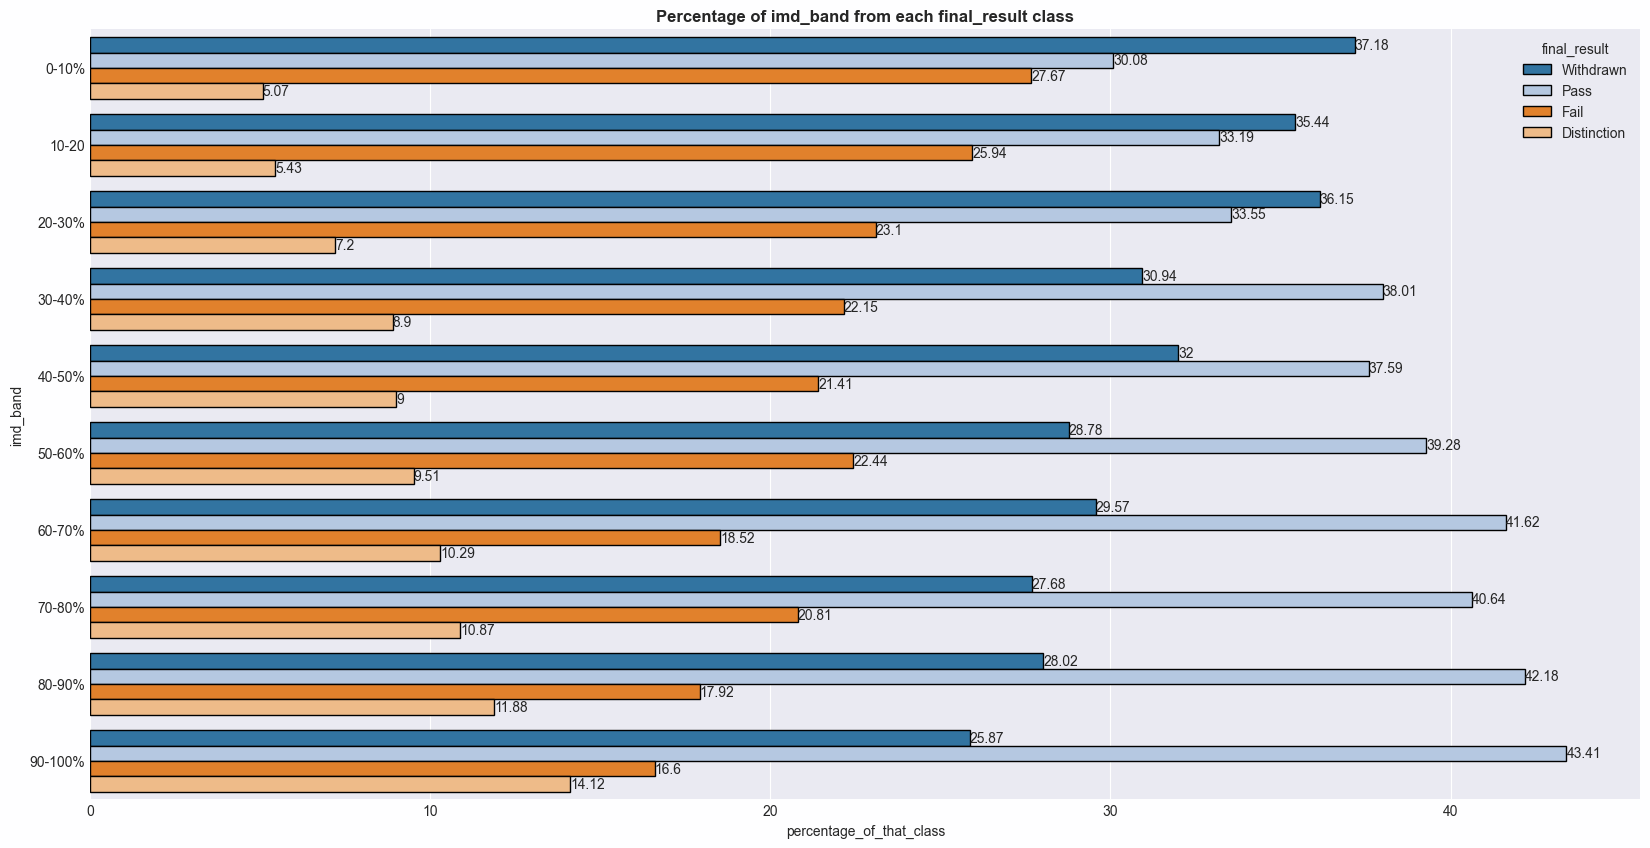

In [33]:
plt.figure(figsize=(20,10))
P.percentage_in_that_class(column='imd_band',data=data,target='final_result',orient='h')

In [34]:
ct = pd.crosstab(data['imd_band'],data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.084 → Weak


{'statistic': np.float64(666.9351969185766),
 'p': np.float64(3.150931444181126e-123),
 'dof': 27,
 'cramers_v': np.float64(0.08403303209460115),
 'strength': 'Weak',
 'expected': array([[ 297.10866527,  726.41754018, 1244.17540182, 1043.29839273],
        [ 315.50409758,  771.39355822, 1321.20830951, 1107.89403469],
        [ 327.88736421,  801.6700972 , 1373.06460835, 1151.37793025],
        [ 317.56797535,  776.43964805, 1329.85102598, 1115.14135061],
        [ 292.17330538,  714.35080363, 1223.50803634, 1025.96785465],
        [ 280.32844165,  685.39063592, 1173.90635919,  984.37456324],
        [ 260.67673591,  637.34308494, 1091.61266756,  915.36751159],
        [ 258.34365669,  631.63880948, 1081.84264024,  907.17489359],
        [ 247.8448002 ,  605.96956991, 1037.87751731,  870.30811257],
        [ 227.56495775,  556.38625246,  952.95343371,  799.09535608]])}

weak relationship

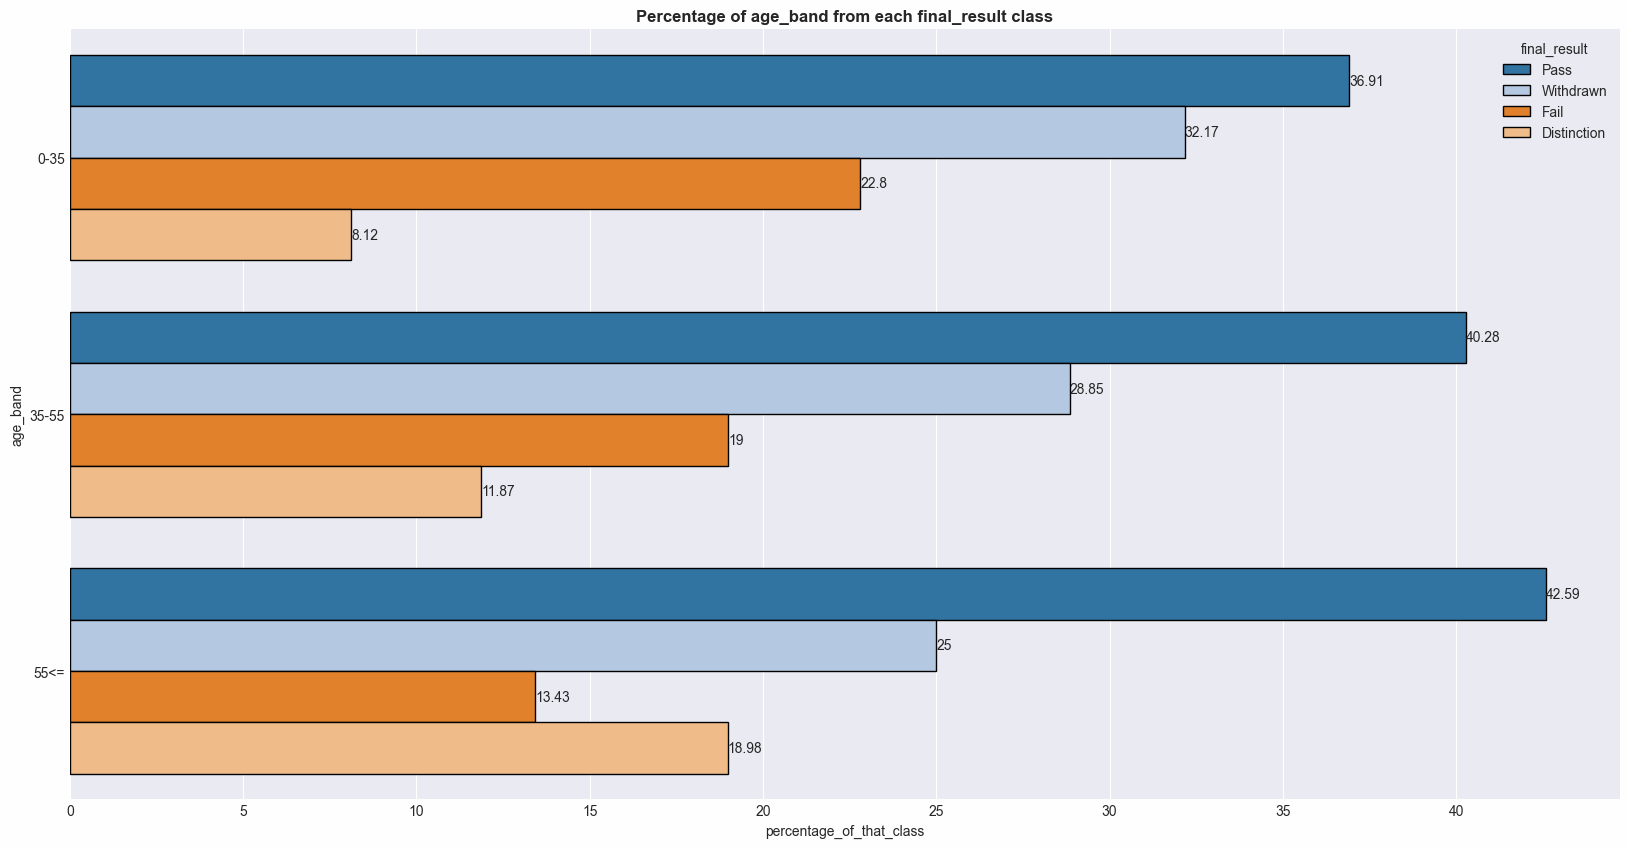

In [35]:
plt.figure(figsize=(20,10))
P.percentage_in_that_class(column='age_band',data=data,target='final_result',orient='h')

In [36]:
ct = pd.crosstab(data['age_band'],data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.058 → Weak


{'statistic': np.float64(222.65079791604964),
 'p': np.float64(2.8310914670885406e-45),
 'dof': 6,
 'cramers_v': np.float64(0.05844333113847598),
 'strength': 'Weak',
 'expected': array([[2128.75942687, 4964.28951002, 8701.58573927, 7149.36532384],
        [ 875.19995091, 2040.9755469 , 3577.49556653, 2939.32893566],
        [  20.04062222,   46.73494309,   81.9186942 ,   67.3057405 ]])}

weak relationship

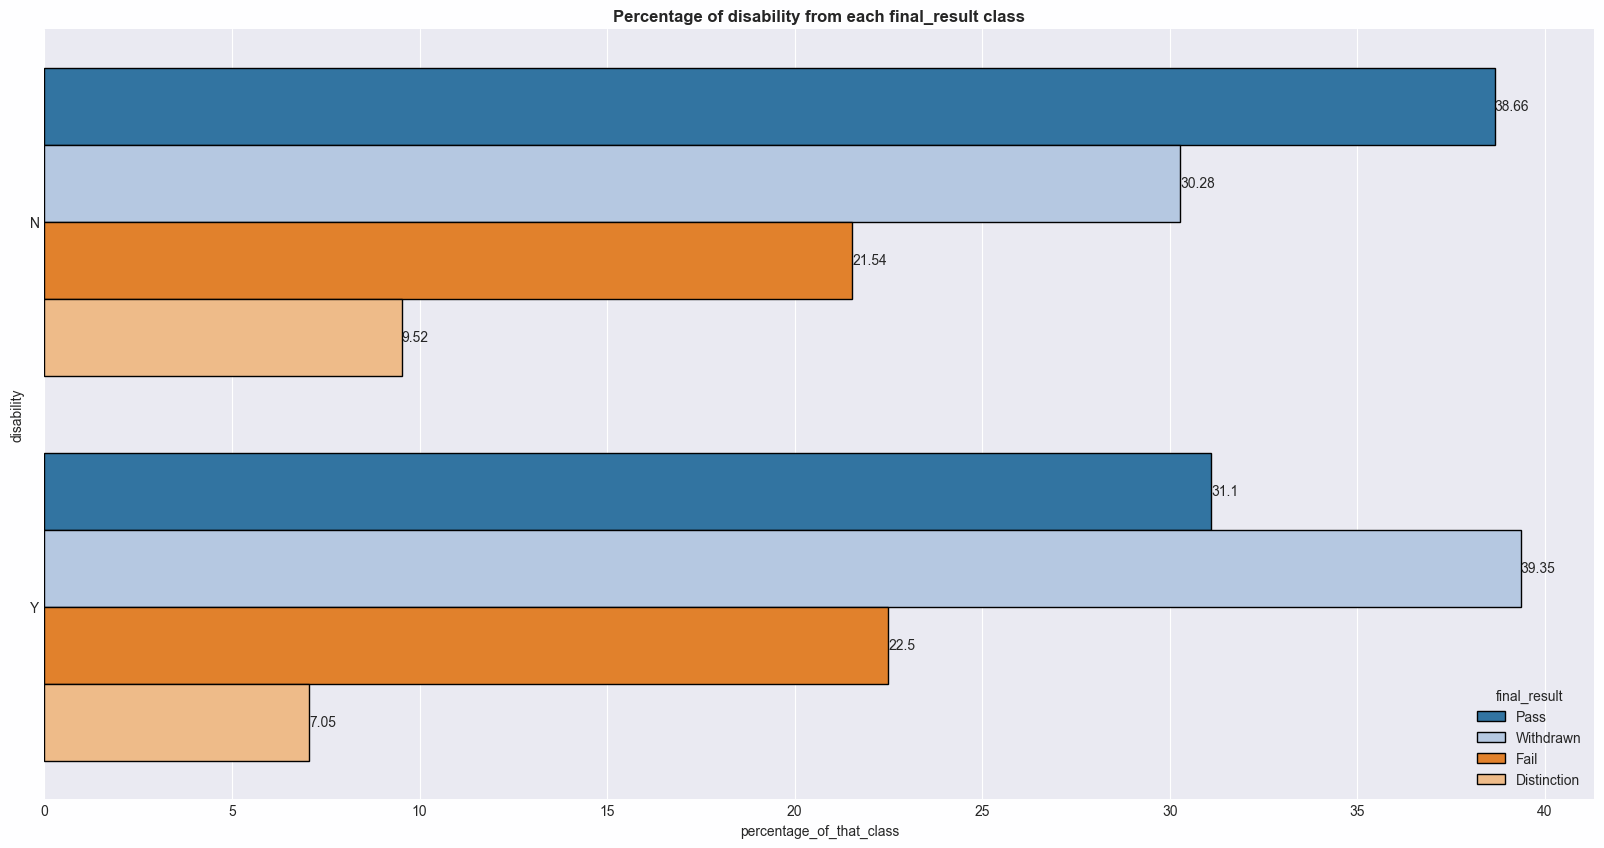

In [37]:
plt.figure(figsize=(20,10))
P.percentage_in_that_class(column='disability',data=data,target='final_result',orient='h')

In [38]:
ct = pd.crosstab(data['disability'],data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.065 → Weak


{'statistic': np.float64(138.45398732595984),
 'p': np.float64(8.143196121271437e-30),
 'dof': 3,
 'cramers_v': np.float64(0.06517642952859402),
 'strength': 'Weak',
 'expected': array([[ 2730.44199675,  6367.41962998, 11161.04283128,  9170.09554199],
        [  293.55800325,   684.58037002,  1199.95716872,   985.90445801]])}

weak relationship

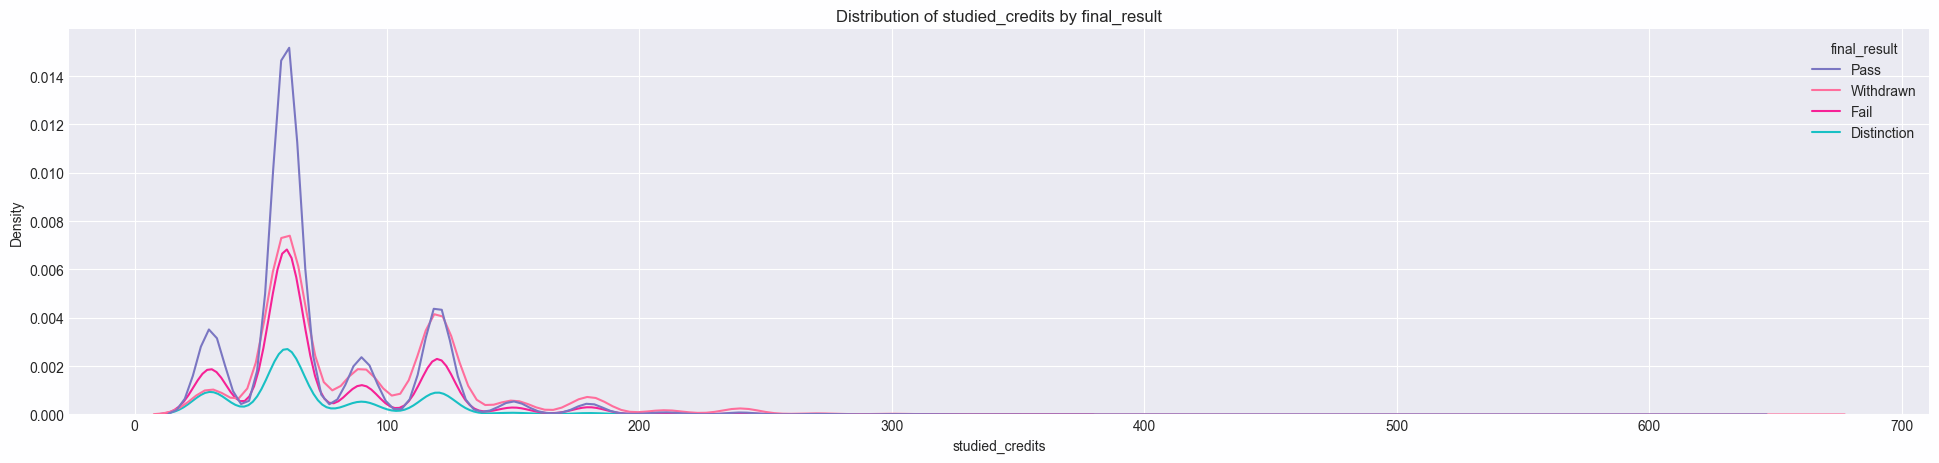

In [42]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='studied_credits',data= data,target='final_result')

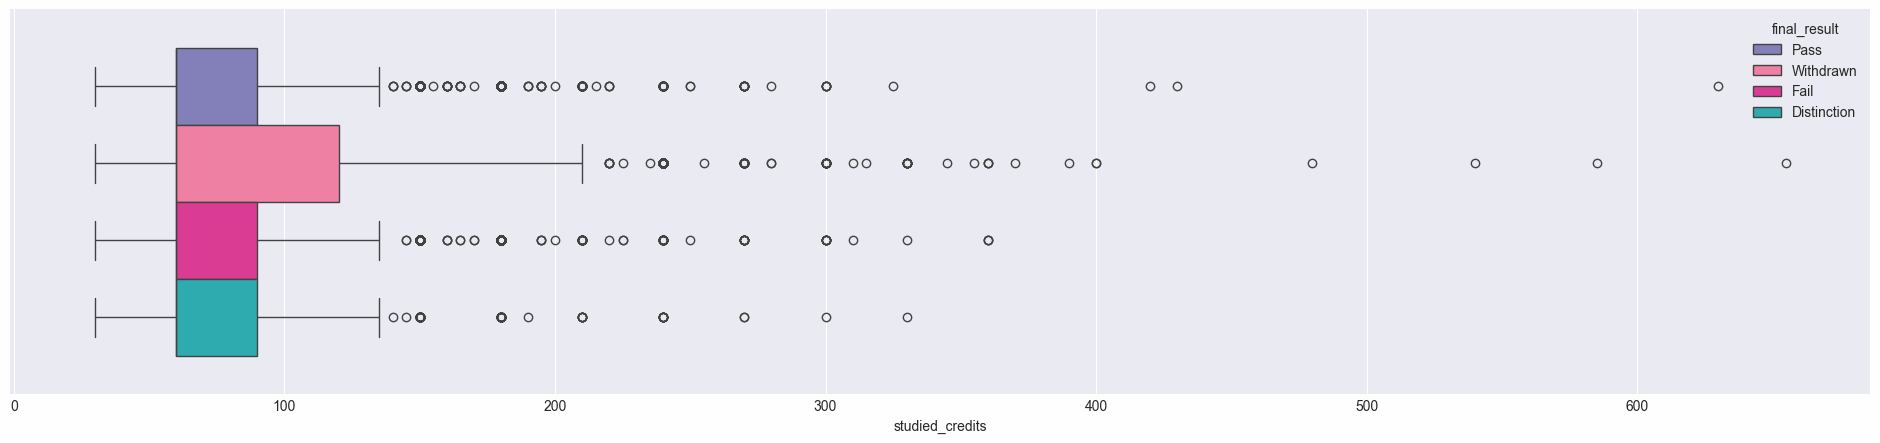

In [44]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'studied_credits',data= data,hue= 'final_result')
plt.show()

In [45]:
data.groupby('final_result')['studied_credits'].mean().round(2)

final_result
Distinction    71.76
Fail           76.09
Pass           74.22
Withdrawn      91.43
Name: studied_credits, dtype: float64

In [46]:
first = data[data['final_result'] == 'Withdrawn']['studied_credits']
second = data[data['final_result'] != 'Withdrawn']['studied_credits']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(793.3267865314332),
 'p': np.float64(1.7841157545554978e-172),
 'result': 'Not equal variance'}

In [48]:
S.ttest(first,second,equal_variance=False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(32.08615607959109),
 'p': np.float64(5.703199750972125e-219),
 'result': 'Reject null (groups different)'}

groups are different

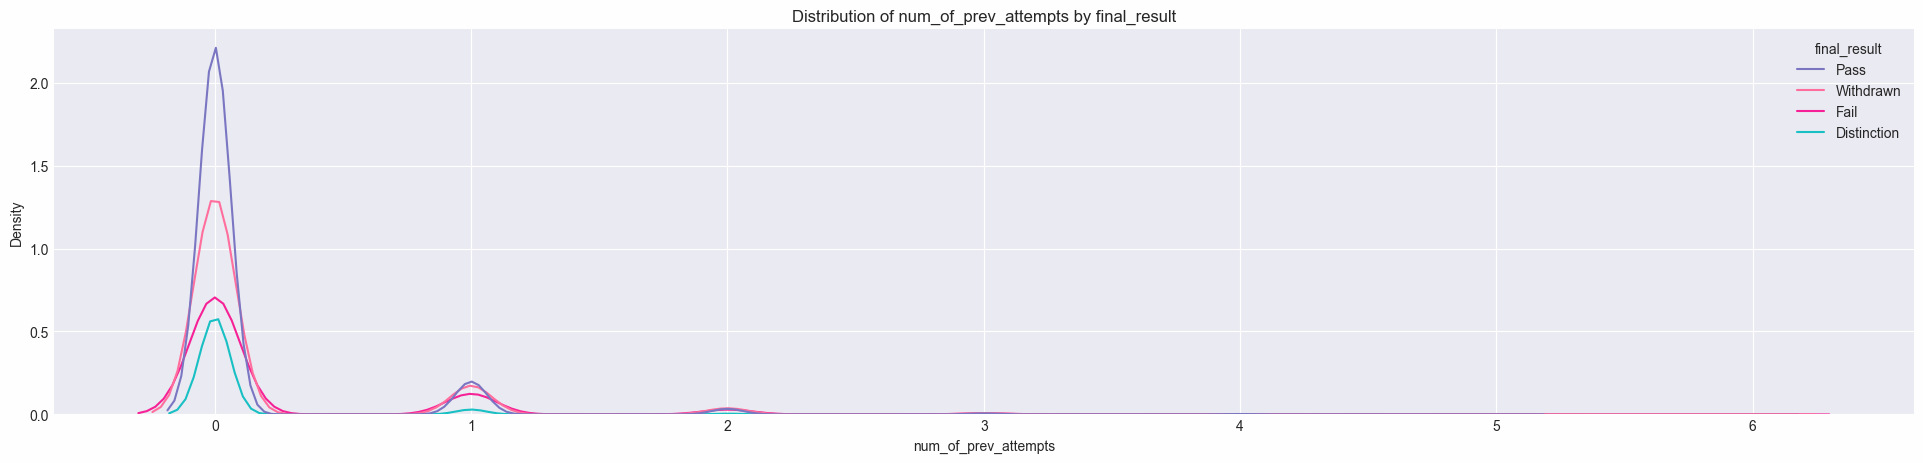

In [51]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='num_of_prev_attempts',data= data,target='final_result')

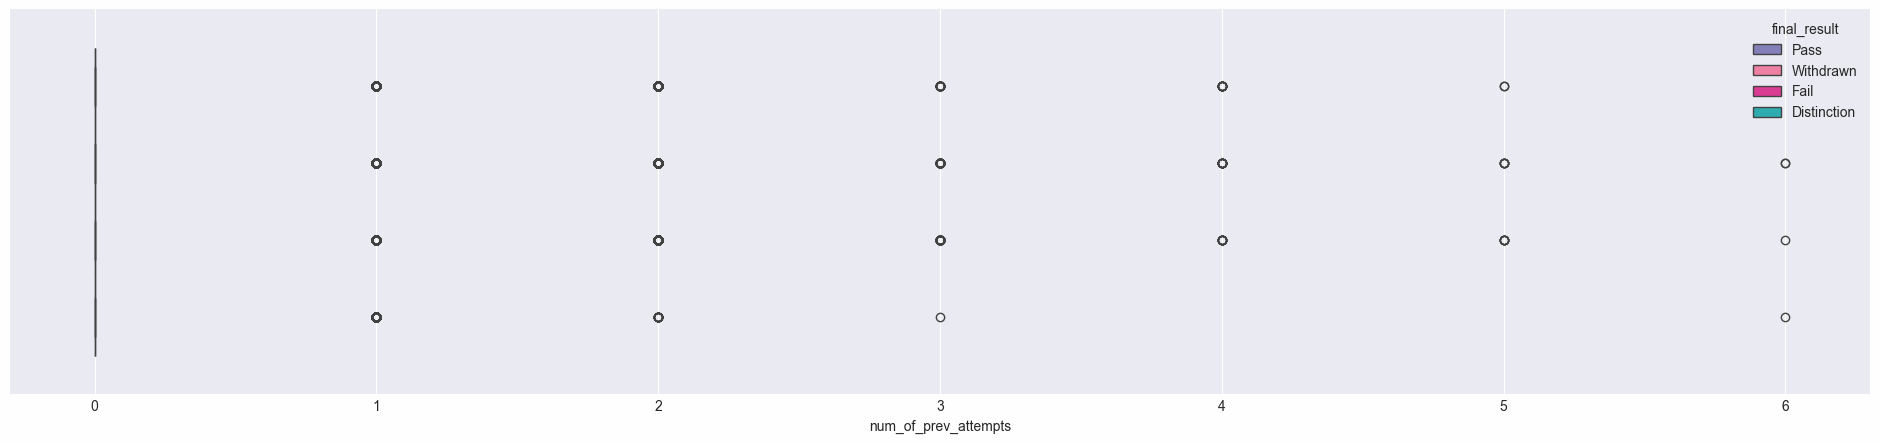

In [52]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'num_of_prev_attempts',data= data,hue= 'final_result')
plt.show()

In [53]:
data.groupby('final_result')['num_of_prev_attempts'].mean().round(2)

final_result
Distinction    0.06
Fail           0.25
Pass           0.12
Withdrawn      0.19
Name: num_of_prev_attempts, dtype: float64

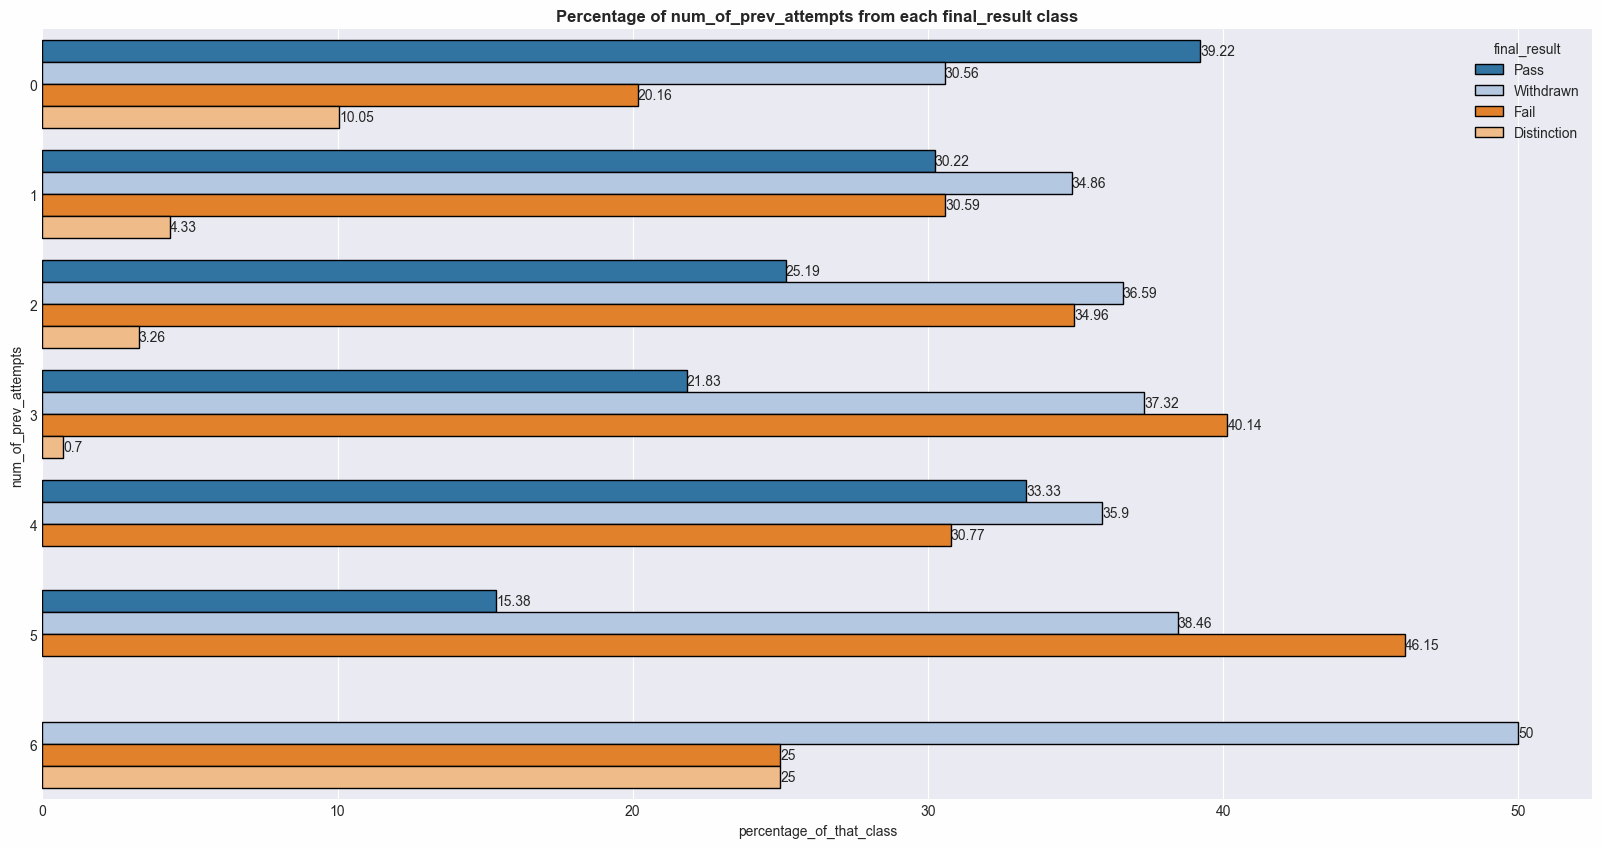

In [54]:
plt.figure(figsize=(20,10))
P.percentage_in_that_class(column='num_of_prev_attempts',data=data,target='final_result',orient='h')

In [55]:
prev_attempt_mask = (data['num_of_prev_attempts'] == 6)
ct = pd.crosstab(prev_attempt_mask,data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.38253
Cramer's V: 0.010 → Weak


{'statistic': np.float64(3.0595908805484657),
 'p': np.float64(0.3825283790911421),
 'dof': 3,
 'cramers_v': np.float64(0.009688789279356104),
 'strength': 'Weak',
 'expected': array([[3.02362888e+03, 7.05113454e+03, 1.23594830e+04, 1.01547536e+04],
        [3.71122634e-01, 8.65461909e-01, 1.51701286e+00, 1.24640260e+00]])}

weak relationship

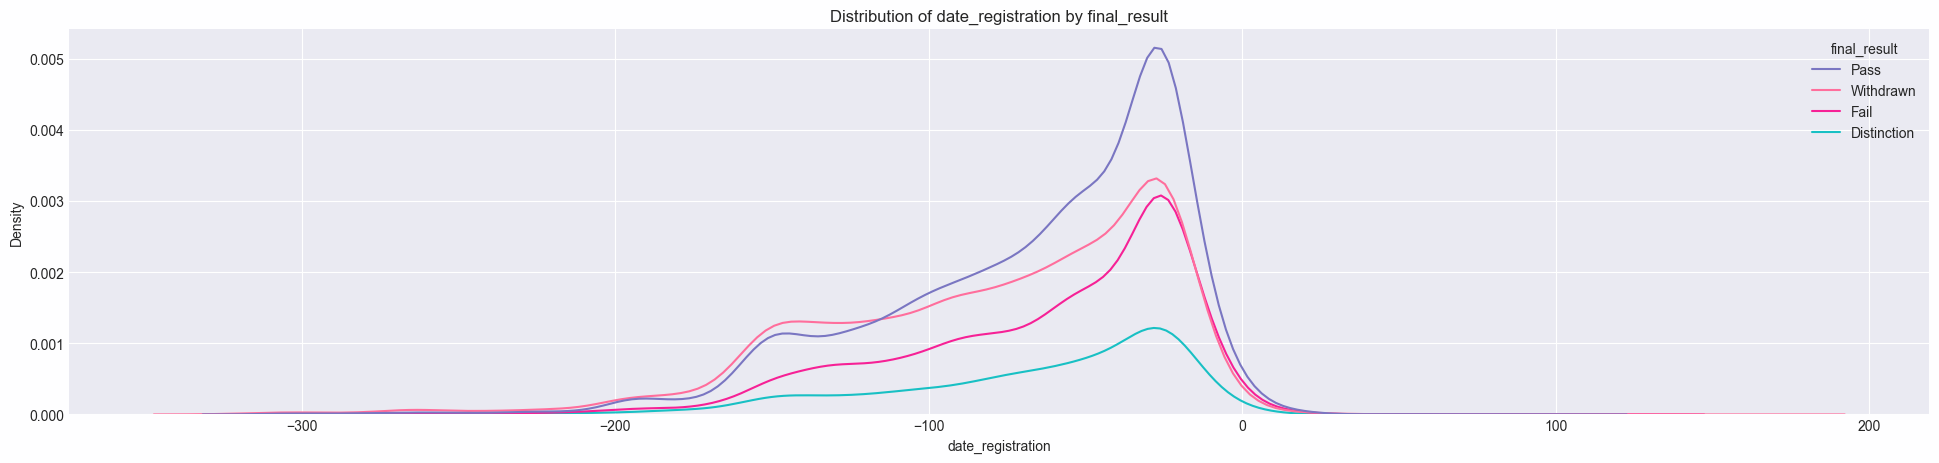

In [56]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='date_registration',data= data,target='final_result')

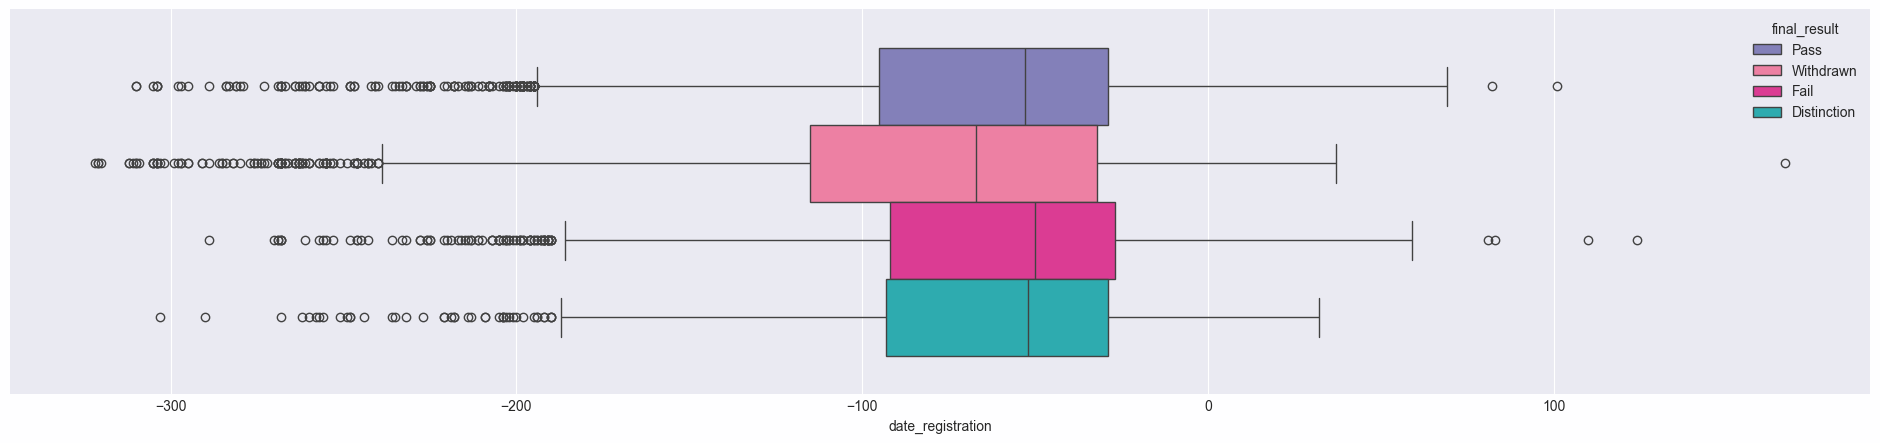

In [57]:
plt.figure(figsize=(24,5))
sns.boxplot(x = 'date_registration',data= data,hue= 'final_result')
plt.show()

In [58]:
data.groupby('final_result')['date_registration'].mean().round(2)

final_result
Distinction   -65.64
Fail          -62.81
Pass          -66.71
Withdrawn     -78.35
Name: date_registration, dtype: float64

In [59]:
first = data[data['final_result'] == 'Withdrawn']['date_registration']
second = data[data['final_result'] != 'Withdrawn']['date_registration']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(231.08616714437625),
 'p': np.float64(5.2127150292418855e-52),
 'result': 'Not equal variance'}

In [60]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(-21.25614237202405),
 'p': np.float64(5.0733117861142815e-99),
 'result': 'Reject null (groups different)'}

groups are different

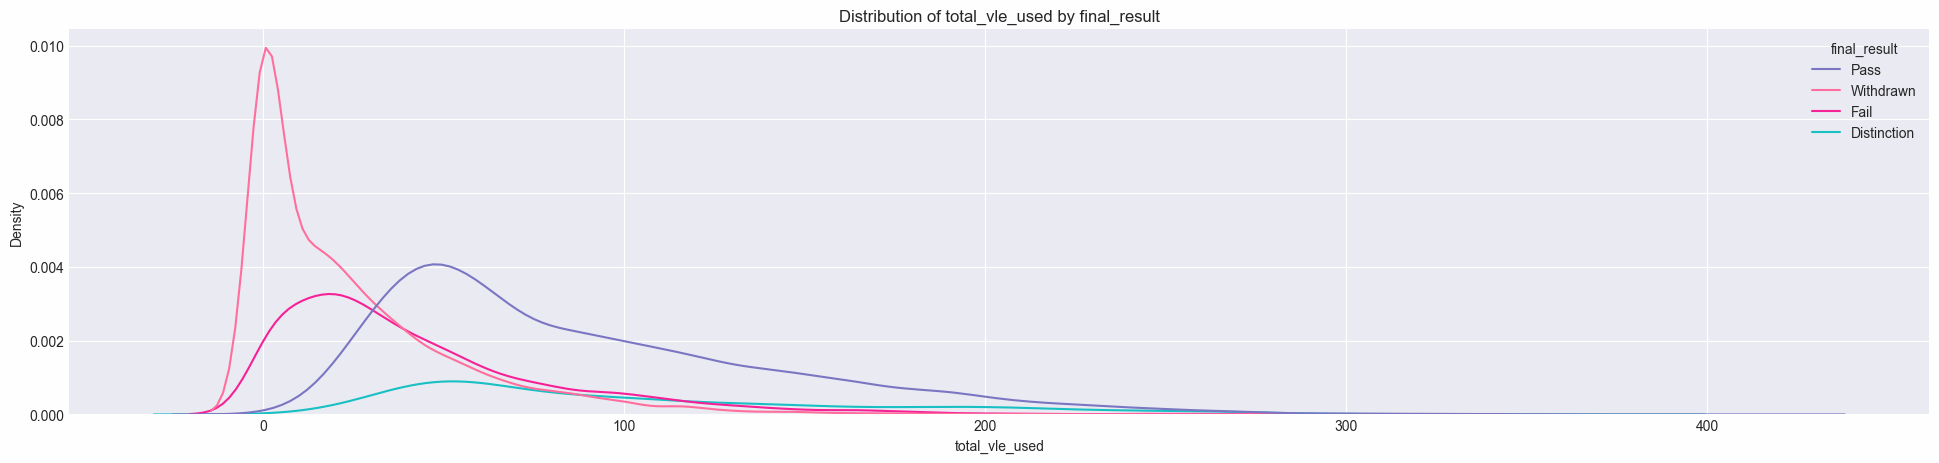

In [61]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='total_vle_used',data= data,target='final_result')

In [62]:
data.groupby('final_result')['total_vle_used'].mean().round(2)

final_result
Distinction    102.45
Fail            43.08
Pass            89.06
Withdrawn       24.23
Name: total_vle_used, dtype: float64

In [63]:
first = data[data['final_result'] == 'Withdrawn']['total_vle_used']
second = data[data['final_result'] != 'Withdrawn']['total_vle_used']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(2416.23050733985),
 'p': np.float64(0.0),
 'result': 'Not equal variance'}

In [64]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(-107.00721733839178),
 'p': np.float64(0.0),
 'result': 'Reject null (groups different)'}

groups are different

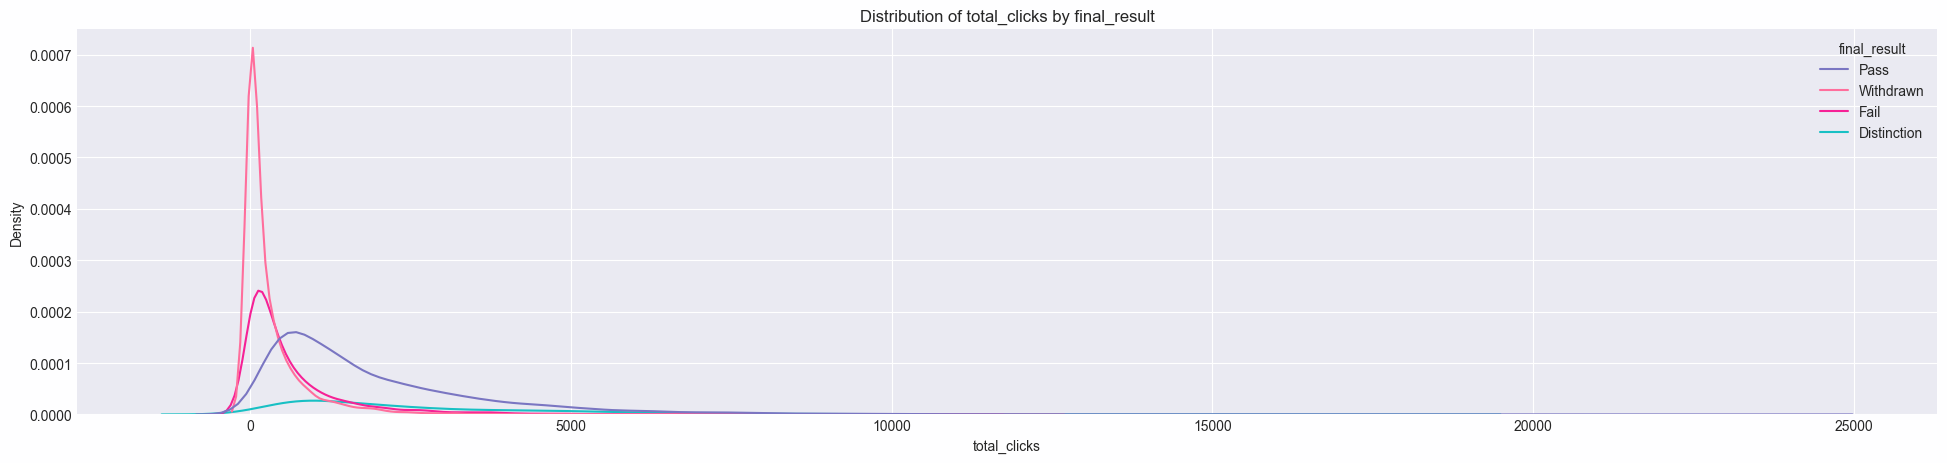

In [65]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='total_clicks',data= data,target='final_result')

In [66]:
data.groupby('final_result')['total_clicks'].mean().round(2)

final_result
Distinction    2666.76
Fail            651.85
Pass           1921.81
Withdrawn       313.95
Name: total_clicks, dtype: float64

In [67]:
first = data[data['final_result'] == 'Withdrawn']['total_clicks']
second = data[data['final_result'] != 'Withdrawn']['total_clicks']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(3147.336007451826),
 'p': np.float64(0.0),
 'result': 'Not equal variance'}

In [68]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(-94.80188520340685),
 'p': np.float64(0.0),
 'result': 'Reject null (groups different)'}

groups are different

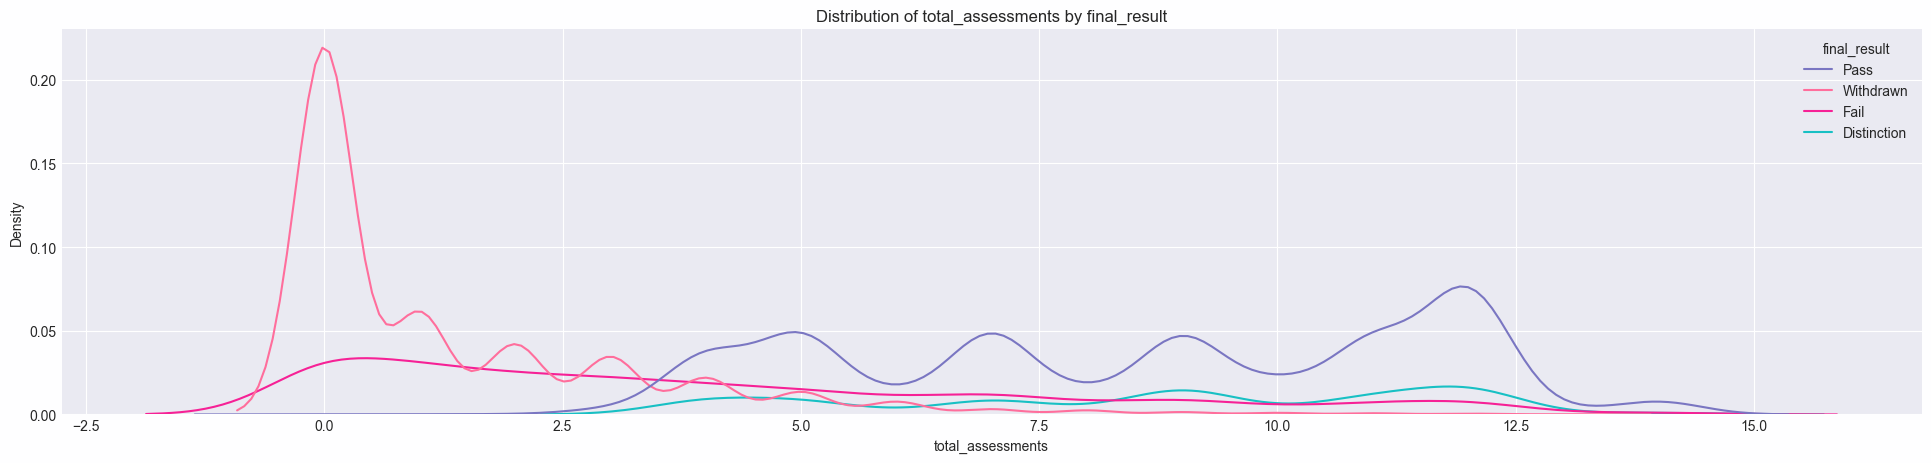

In [69]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='total_assessments',data= data,target='final_result')

In [70]:
data.groupby('final_result')['total_assessments'].mean().round(2)

final_result
Distinction    8.71
Fail           4.04
Pass           8.58
Withdrawn      1.29
Name: total_assessments, dtype: Float64

In [71]:
first = data[data['final_result'] == 'Withdrawn']['total_assessments']
second = data[data['final_result'] != 'Withdrawn']['total_assessments']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(7111.089872019365),
 'p': np.float64(0.0),
 'result': 'Not equal variance'}

In [72]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(-183.74894062232207),
 'p': np.float64(0.0),
 'result': 'Reject null (groups different)'}

groups are different

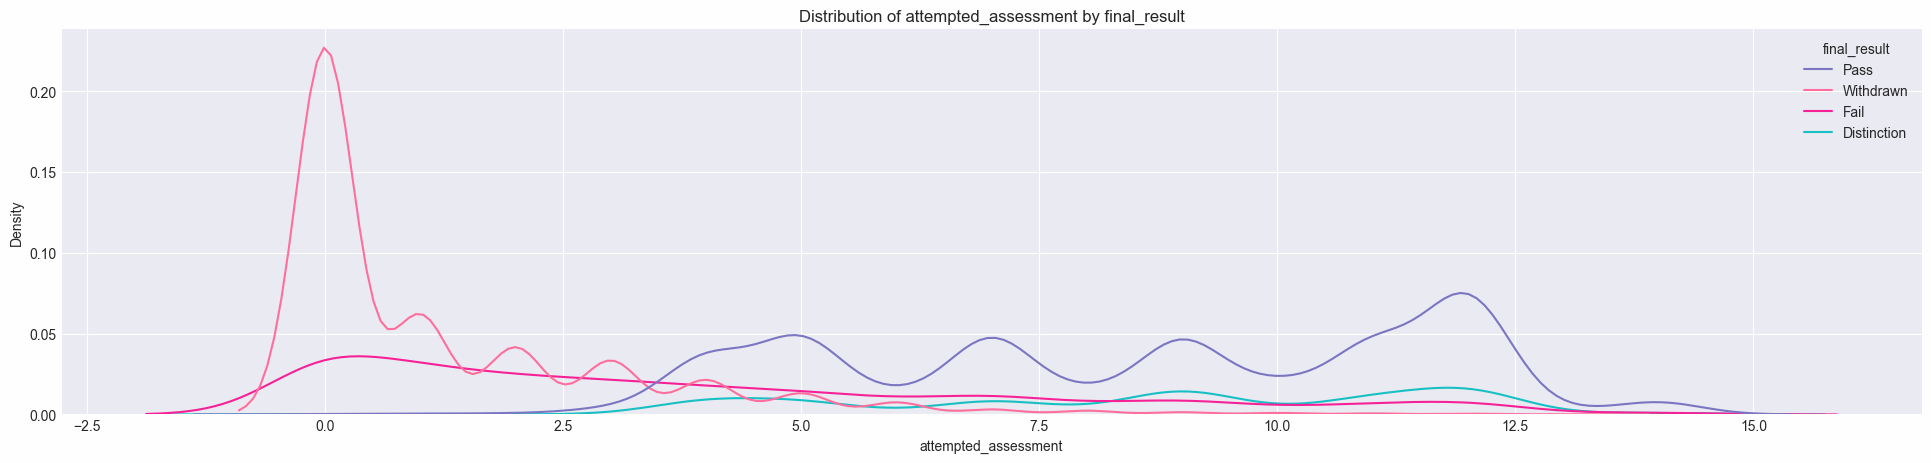

In [74]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='attempted_assessment',data= data,target='final_result')

In [75]:
data.groupby('final_result')['attempted_assessment'].mean().round(2)

final_result
Distinction    8.68
Fail           3.92
Pass           8.53
Withdrawn      1.25
Name: attempted_assessment, dtype: Float64

In [76]:
first = data[data['final_result'] == 'Withdrawn']['attempted_assessment']
second = data[data['final_result'] != 'Withdrawn']['attempted_assessment']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(7623.90475822328),
 'p': np.float64(0.0),
 'result': 'Not equal variance'}

In [77]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(-182.6618887628739),
 'p': np.float64(0.0),
 'result': 'Reject null (groups different)'}

different groups

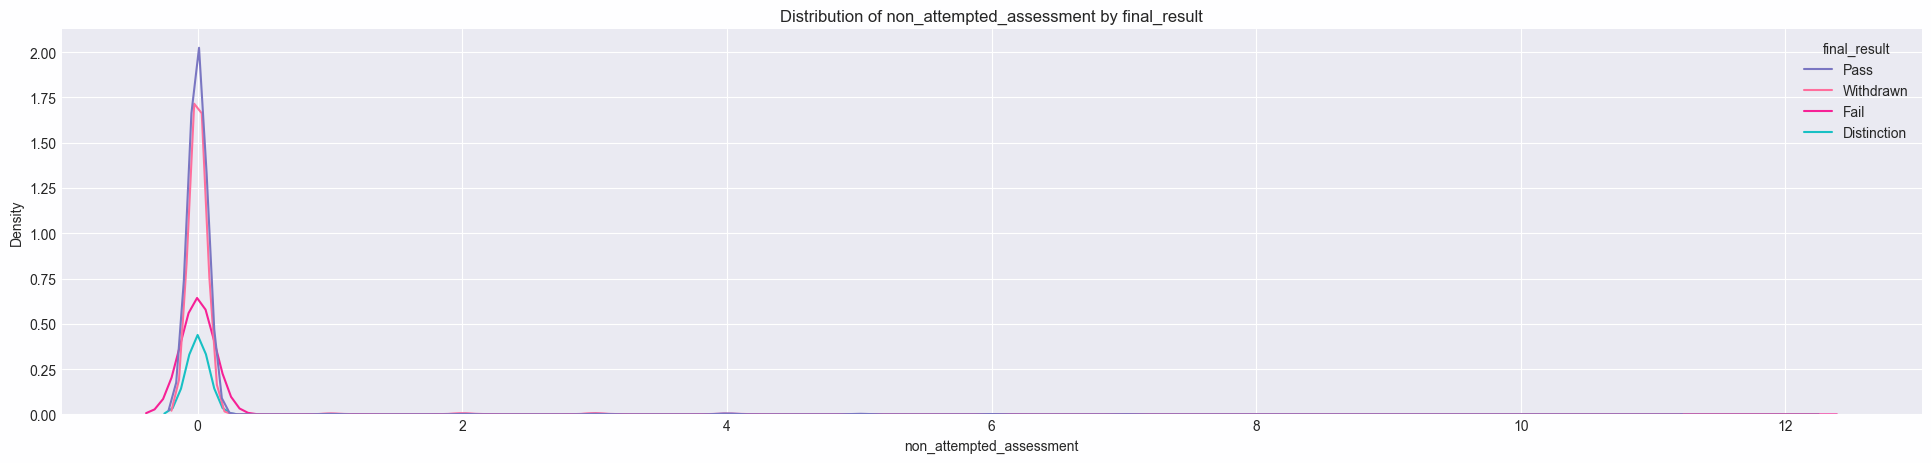

In [78]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='non_attempted_assessment',data= data,target='final_result')

In [ ]:
data.groupby('final_result')['non_attempted_assessment'].mean().round(2)

final_result
Distinction    0.03
Fail           0.12
Pass           0.05
Withdrawn      0.04
Name: non_attempted_assessment, dtype: Float64

In [81]:
first = data[data['final_result'] == 'Withdrawn']['non_attempted_assessment']
second = data[data['final_result'] != 'Withdrawn']['non_attempted_assessment']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00025 → Not equal variance


{'statistic': np.float64(13.439767351849948),
 'p': np.float64(0.00024673733323662045),
 'result': 'Not equal variance'}

In [82]:
S.ttest(first,second,False)

T-test p-value: 0.00004 → Reject null (groups different)


{'statistic': np.float64(-4.132256023972425),
 'p': np.float64(3.603241868372302e-05),
 'result': 'Reject null (groups different)'}

different groups

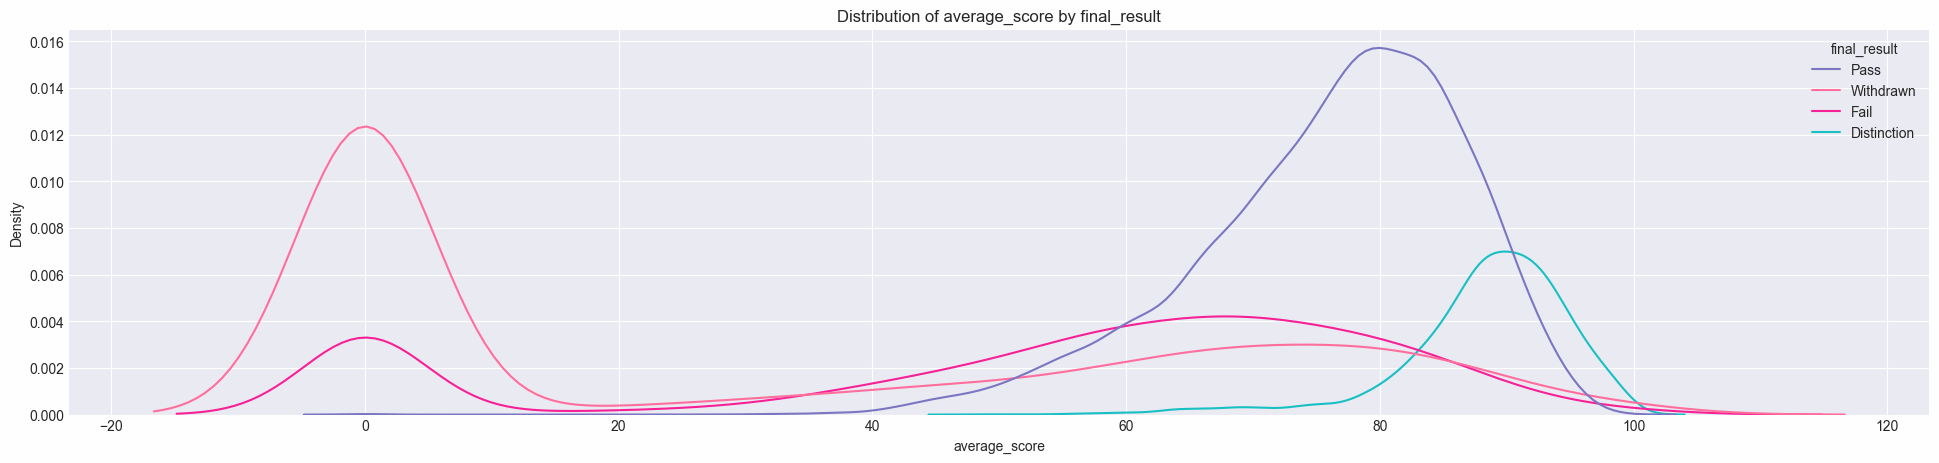

In [83]:
plt.figure(figsize=(24,5))
P.kde_in_both_class(column='average_score',data= data,target='final_result')

In [84]:
data.groupby('final_result')['average_score'].mean().round(2)

final_result
Distinction    88.49
Fail           52.51
Pass           76.16
Withdrawn      29.50
Name: average_score, dtype: float64

In [85]:
first = data[data['final_result'] == 'Withdrawn']['average_score']
second = data[data['final_result'] != 'Withdrawn']['average_score']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00000 → Not equal variance


{'statistic': np.float64(2529.8315794043983),
 'p': np.float64(0.0),
 'result': 'Not equal variance'}

In [86]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


{'statistic': np.float64(-107.99567105888532),
 'p': np.float64(0.0),
 'result': 'Reject null (groups different)'}

different groups

### Findings from bivariate analysis with target column

***Categorical with final_result***

CCC value in code_module is showing high percentage of withdrawn observations

no strong relationship is shown with code_presentation column

no strong relationship is found with gender column

no particular relationship is found with region column

no fromal quals value in highest_education is showing high percentage of withdrawn observations

imd_band is showing a relationship, smaller the imd_band more the withdrawn observation

age_band is showing higher the age_band less the chance of withdrawn

Y in disability is showing high percentage of withdrawn

***Numerical with final_result***

for withdrawn category studied_credits column have high mean compared to other categories

num_of_previous_attempt is showing relatively high percentage of withdrawn for value 6

date_registration is showing early registration have higher withdrawn

total_vle_used is showing that less vle usage leads to higher withdrawn

total_click is showing for withdrawn category average total_click is lowest

total_assessments is showing for withdrawn category average total_assessments is lowest

attempted_assessment is showing less the value is higher the chance of withdrawn

non_attempted_assessment is not showing any particular relationship

average_score is showing low score leads to high withdrawn value